<a href="https://colab.research.google.com/github/tjwei/taishin20190827/blob/master/Basic_ML/classifier_on_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 用 KNN 的方式做推薦

台新分析開發環境案客戶資料
https://drive.google.com/drive/u/2/folders/1AAXWPcB9xiDe_qX87ce5XL-utkASWxRe

請先連到這個分享資料夾，並且按下右鍵，加入你的 Google 雲端硬碟


In [1]:
# 這個是授權存取你的 Google 雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 確認真的連上了資料
!ls drive/My\ Drive/台新分析開發環境案客戶資料

'Copy of 0606_口述台新資料欄位.m4a'
'Copy of 0610_嘉駿寄來的欄位內容.png'
'Copy of 0621_data_original.zip'
'Copy of profile.csv'
'Copy of profile.gsheet'
'Copy of result_y1.csv'
'Copy of result_y1.gsheet'
'Copy of result_y2.csv'
'Copy of sr_1.csv'
'Copy of sr_2.csv'
'Copy of sr_3.csv'
'Copy of sr_4.csv'
'Copy of status.csv'
'Copy of visa-merchant-data-standards-manual_用來對照sr_1.csv中的mcc欄位.pdf'
'Copy of zip 對照表.xlsx'
'Copy of 檔案欄位說明_MOOCS.XLSX'


In [0]:
# 正式開始
import pandas as pd
import os.path
import numpy as np

In [0]:
DATA_DIR='drive/My Drive/台新分析開發環境案客戶資料'
status_fn = os.path.join(DATA_DIR, 'Copy of status.csv')
status_df = pd.read_csv(status_fn)
profile_fn = os.path.join(DATA_DIR, 'Copy of profile.csv')
profile_df = pd.read_csv(profile_fn)

In [5]:
status_df.head()

,YYYYMM,CUST_NO,py_a,py_b,py_c,py_d,py_e,py_f,py_g,py_h,py_i,py_j,py_k,py_l,as_a,as_b,as_c,as_d,as_e,as_f,as_g,as_h,as_i,as_j,as_k,as_l,as_m,as_n,scr
0,201807,9519340,24858,3014,4311,0,26422,21844,109323.0,105073.0,0.0,92955.0,4135.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,419.0
1,201808,9519340,26422,3676,1473,0,24544,22747,108583.0,109323.0,0.0,97804.0,2130.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,419.0
2,201809,9519340,24544,3693,4520,0,25620,20851,114245.0,108583.0,0.0,93801.0,814.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,419.0
3,201810,9519340,25620,3515,8407,0,30798,22106,118071.0,114245.0,0.0,102422.0,1441.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,419.0
4,201811,9519340,30798,3958,5309,0,32544,26840,122021.0,118071.0,0.0,105505.0,721.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,315.0


In [0]:
profile_df.set_index('CUST_NO', inplace=True)

In [17]:
profile_df.head()

,c_gender,n_age,c_zip,c_edu,c_mry,c_job,c_occp,a_incm_flg,x_flg_house,CAR_FLG
CUST_NO,,,,,,,,,,
21969,M,48,110,4,S,106,901,6,1.0,0
24081,M,42,100,4,S,106,504,4,7.0,2
37917,M,59,100,5,S,508,0,5,99.0,2
38277,M,59,104,3,M,511,1101,3,9.0,2
38312,M,59,406,5,S,103,813,4,2.0,2


In [0]:
y = profile_df.c_gender[status_df.CUST_NO]
y.index=status_df.index
status_df['y'] = y

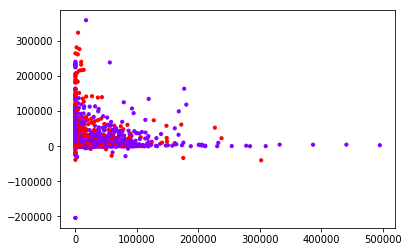

In [38]:
import matplotlib.pyplot as plt
X, y = status_df[['py_k', 'py_e']].values.astype('float'), status_df.y=='M'
# 標出 sample 點
plt.scatter(X[:5000,0], X[:5000, 1],  c=y[:5000], cmap=plt.cm.rainbow, zorder=10, s=10);


In [19]:
set(status_df.y)

{1, 2, 3, 4, 5, 6}